<a href="https://colab.research.google.com/github/gustahlucas/Inteligencia-Artificial/blob/master/BCC740_GASudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np


In [0]:
def compute_conflict(game,initial_game = []):
  
  if initial_game:
    for i in range(len(game)):
      for j in range(len(game[0])):
        if initial_game[i,j] != 0:
          game[i,j] = initial_game[i,j]
  
  
  conflict = 0
  
  for i in range(len(game)):
    conflict += len(game) - len(set(game[i,:]))
    conflict += len(game) - len(set(game[:,i]))
  
  block_size = int(len(game)**(1/2))
  
  for i in range(0,len(game),block_size):
    for j in range(0,len(game),block_size):
      block = game[i:(i+block_size),j:(j+block_size)]
      conflict += len(game) - \
      len(set(block.reshape(block_size*block_size)))
    
  return conflict

In [0]:
def crossover(p1,p2):
  ind_size = len(p1)
  cut1 = np.random.randint(0,ind_size)
  cut2 = np.random.randint(0,ind_size)

  if cut1 >= cut2:
    aux = cut1
    cut1 = cut2
    cut2 = aux

  off1 = np.zeros(ind_size)
  off2 = np.zeros(ind_size)

  for i in range(ind_size):  
    if i <= cut1:
      off1[i] = p1[i]
      off2[i] = p2[i]
    elif i > cut1  and i <= cut2:
      off1[i] = p2[i]
      off2[i] = p1[i]
    else:
      off1[i] = p1[i]
      off2[i] = p2[i]

  return (off1,off2)

In [0]:
def mutation(ind,tm,game_size):
  for i in range(len(ind)):
    if np.random.rand() <= tm:
      ind[i] = np.random.randint(1,game_size+1)

  return ind

In [0]:
def tournament(pop,pop_val,k):
  idx = np.random.randint(0,len(pop),k)

  participants = pop[idx,:]
  part_val = pop_val[idx]

  champ_idx = np.argmin(part_val)
  champ = participants[champ_idx,:]
  
  return champ

In [0]:
def selection(pop,pop_val,newpop,new_val,pop_size):
  pop = np.concatenate((pop,newpop),axis = 0)
  
  pop_val = np.concatenate((pop_val,new_val))

  idx = np.argsort(pop_val)

  pop = pop[idx,:]
  pop_val = pop_val[idx]

  pop = pop[0:pop_size,:]
  pop_val = pop_val[0:pop_size]

  return (pop,pop_val)

In [0]:
def conflict(pop,game_size,initial_game = []):
  val = []
  for i in range(len(pop)):
    val.append(compute_conflict(pop[i].reshape(game_size,game_size),initial_game))

  return np.array(val)

In [0]:
from tqdm import tqdm

def GA_Sudoku(max_iter=1000, k=10, tm=0.05, game_size=9, pop_size = 100, initial_game = [], do_plots = True):

  # Generate the initial population
  ind_size = game_size*game_size  
  pop = np.random.randint(1,game_size+1,(pop_size,ind_size))
  
  # Evaluate the initial population
  pop_val = conflict(pop,game_size,initial_game)
  
  # Store the serie of best individual through time
  best_vals = []

  # Generational loop
  for i in tqdm(range(max_iter)):
    
    # Initialize a new empty population
    new_pop = np.zeros((pop_size,ind_size))
    
    # Populate the data structure
    for j in range(0,pop_size,2):  
      # Select the first parent
      p1 = tournament(pop,pop_val,k)
      # Select the the second parent
      p2 = tournament(pop,pop_val,k)

      # Generate offspring through crossover and mutation
      off = crossover(p1,p2)
      new_pop[j,:] = mutation(off[0],tm,game_size)
      new_pop[j+1,:] = mutation(off[1],tm,game_size)
    
    # Evaluate the new population
    new_val = conflict(new_pop,game_size,initial_game)
    
    # Select the best individuals population
    sel_res = selection(pop,pop_val,new_pop,new_val,pop_size)
    pop = sel_res[0]
    pop_val = sel_res[1]

    # Store the best individual at that generation
    best_idx = np.argmin(pop_val)
    best = pop[best_idx,:]
    best_val = pop_val[best_idx]
    best_vals.append(best_val)

  best = best.reshape(game_size,game_size)
  
  if initial_game:
    for i in range(len(best)):
      for j in range(len(best[0])):
        if initial_game[i,j] != 0:
          best[i,j] = initial_game[i,j]
  
  if do_plots:
    import matplotlib.pyplot as plt
    plt.plot(best_vals)
    print('Found Sudoku')
    print(best)
    print('Number of Conflicts = {}'.format(best_val))

  return best


100%|██████████| 20000/20000 [1:14:28<00:00,  4.74it/s]

Found Sudoku
[[1. 4. 3. 5. 9. 2. 6. 8. 7.]
 [5. 8. 7. 3. 6. 1. 2. 9. 4.]
 [9. 6. 2. 7. 4. 8. 5. 1. 3.]
 [8. 7. 6. 2. 5. 9. 3. 4. 1.]
 [3. 1. 2. 6. 7. 4. 8. 5. 9.]
 [4. 5. 9. 8. 1. 3. 7. 6. 2.]
 [6. 4. 5. 1. 3. 7. 9. 2. 8.]
 [2. 9. 1. 4. 8. 6. 7. 3. 5.]
 [7. 3. 8. 9. 2. 5. 1. 4. 6.]]
Number of Conflicts = 4


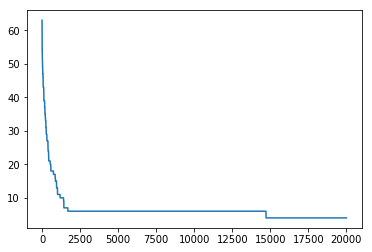

In [0]:
sudoku = GA_Sudoku(max_iter=20000, k=3, tm=0.1, game_size=9, pop_size = 1500, initial_game = [], do_plots = True)